In [1]:
#Labrary Definition
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Scene
scene = cv2.imread('object_detection_project\scenes\h1.jpg',cv2.COLOR_BGR2RGB)

#Load Model
model = cv2.imread('object_detection_project\scenes\zero.jpg',cv2.COLOR_BGR2RGB)


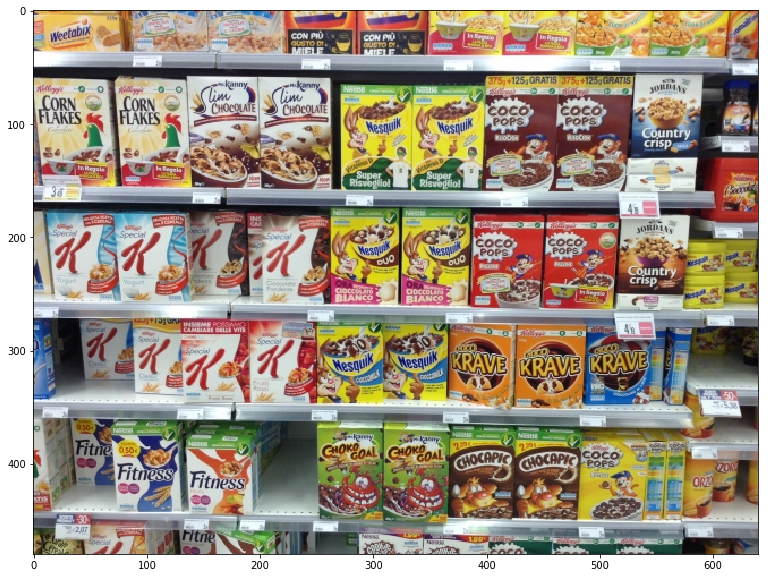

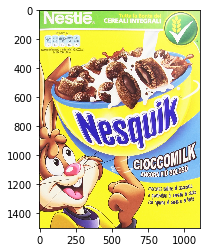

In [3]:
#Plot Scene
plt.figure(figsize=(20, 10)) 
plt.imshow(cv2.cvtColor(scene,cv2.COLOR_BGR2RGB))

#Plot Model
plt.figure() 
plt.imshow(cv2.cvtColor(model,cv2.COLOR_BGR2RGB))

In [4]:
sift = cv2.xfeatures2d.SIFT_create()
gray= cv2.cvtColor(scene,cv2.COLOR_BGR2GRAY)
kp = sift.detect(scene,None)
print(kp)
img=cv2.drawKeypoints(scene,kp,scene)

cv2.imwrite('sift_keypoints.jpg',img)

[<KeyPoint 00000185F5AA95A0>, <KeyPoint 00000185F5AA9810>, <KeyPoint 00000185FDAAF480>, <KeyPoint 00000185FDAAF4B0>, <KeyPoint 00000185FDAAF930>, <KeyPoint 00000185FDAAF7E0>, <KeyPoint 00000185FDAAF510>, <KeyPoint 00000185FDAAF9C0>, <KeyPoint 00000185FDAAF9F0>, <KeyPoint 00000185FDAAFAE0>, <KeyPoint 00000185FDAAF870>, <KeyPoint 00000185FDAAF8A0>, <KeyPoint 00000185FDAAF8D0>, <KeyPoint 00000185FDAAF990>, <KeyPoint 00000185FDAAFA50>, <KeyPoint 00000185FDAAF7B0>, <KeyPoint 00000185FDAAFB10>, <KeyPoint 00000185FDAAFAB0>, <KeyPoint 00000185FDAAF900>, <KeyPoint 00000185FDAAFD50>, <KeyPoint 00000185FDAAFD20>, <KeyPoint 00000185FDAAFCF0>, <KeyPoint 00000185FDAAFCC0>, <KeyPoint 00000185FDAAFE40>, <KeyPoint 00000185FDAAFE10>, <KeyPoint 00000185FDAAFE70>, <KeyPoint 00000185FDAAFEA0>, <KeyPoint 00000185FDAAFED0>, <KeyPoint 00000185FDAAFF00>, <KeyPoint 00000185FDAAFF30>, <KeyPoint 00000185FDAAFF60>, <KeyPoint 00000185FDAAFF90>, <KeyPoint 00000185FDAAFFC0>, <KeyPoint 0000018582006030>, <KeyPoint 000

True

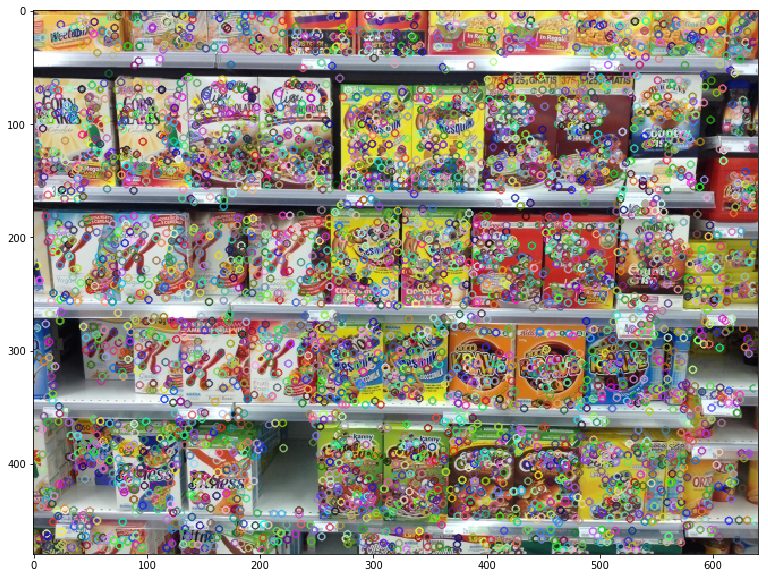

In [5]:
#Plot Scene
plt.figure(figsize=(20, 10)) 
plt.imshow(cv2.cvtColor(scene,cv2.COLOR_BGR2RGB))

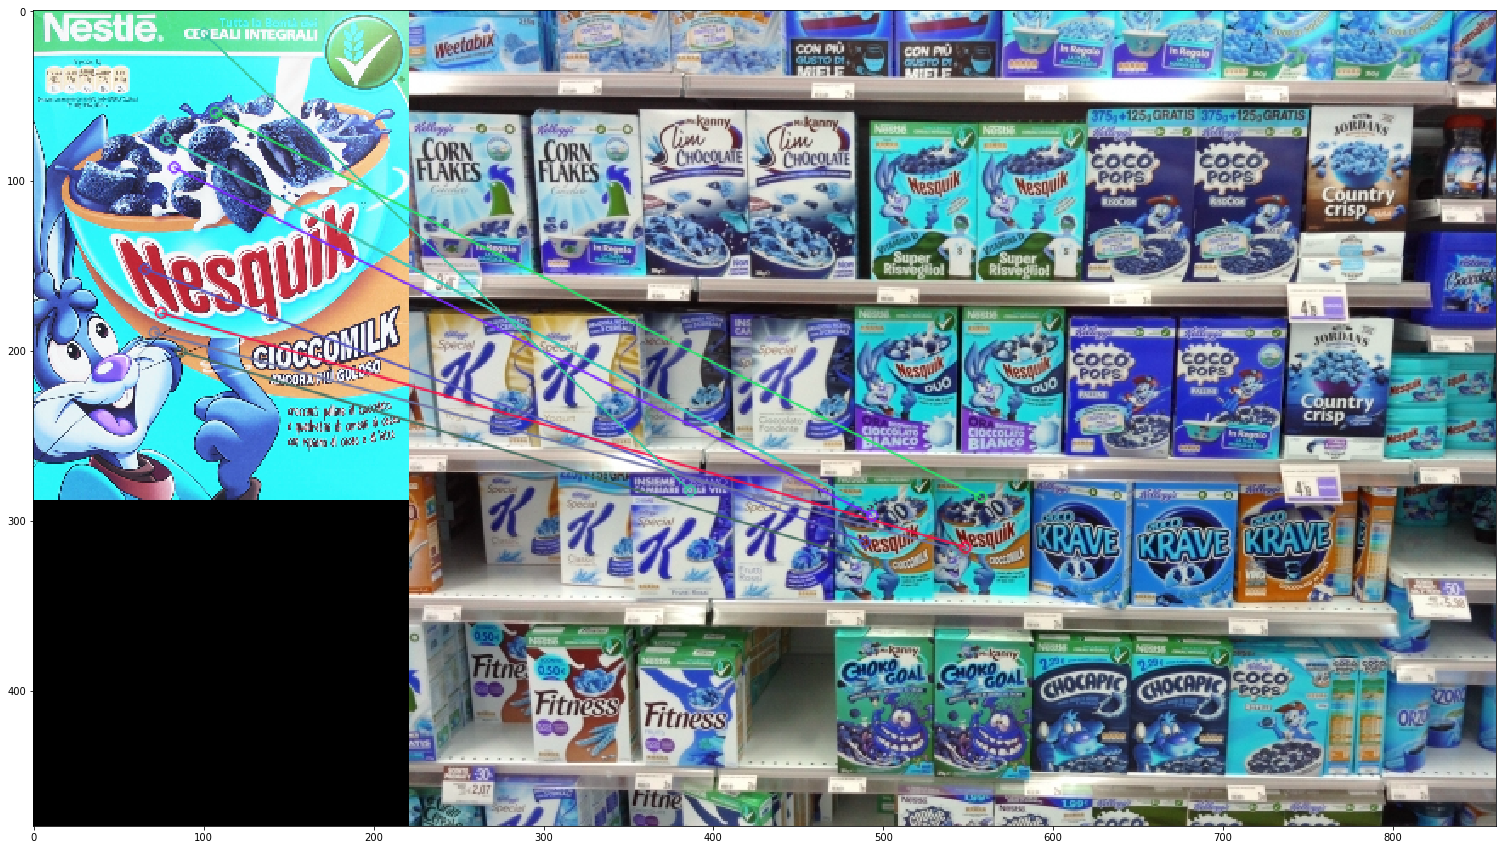

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('object_detection_project\scenes\zero.jpg',cv2.COLOR_BGR2RGB) # queryImage
img2 = cv2.imread('object_detection_project\scenes\h1.jpg',cv2.COLOR_BGR2RGB) # trainImage

#percent by which the image is resized
scale_percent = 20
#calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] *3*scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
img1 = cv2.resize(img1, dsize)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.55*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,scene,flags=2)

plt.figure(figsize=(30, 15))
plt.imshow(img3)
plt.show()

Not enough matches are found - 0/10


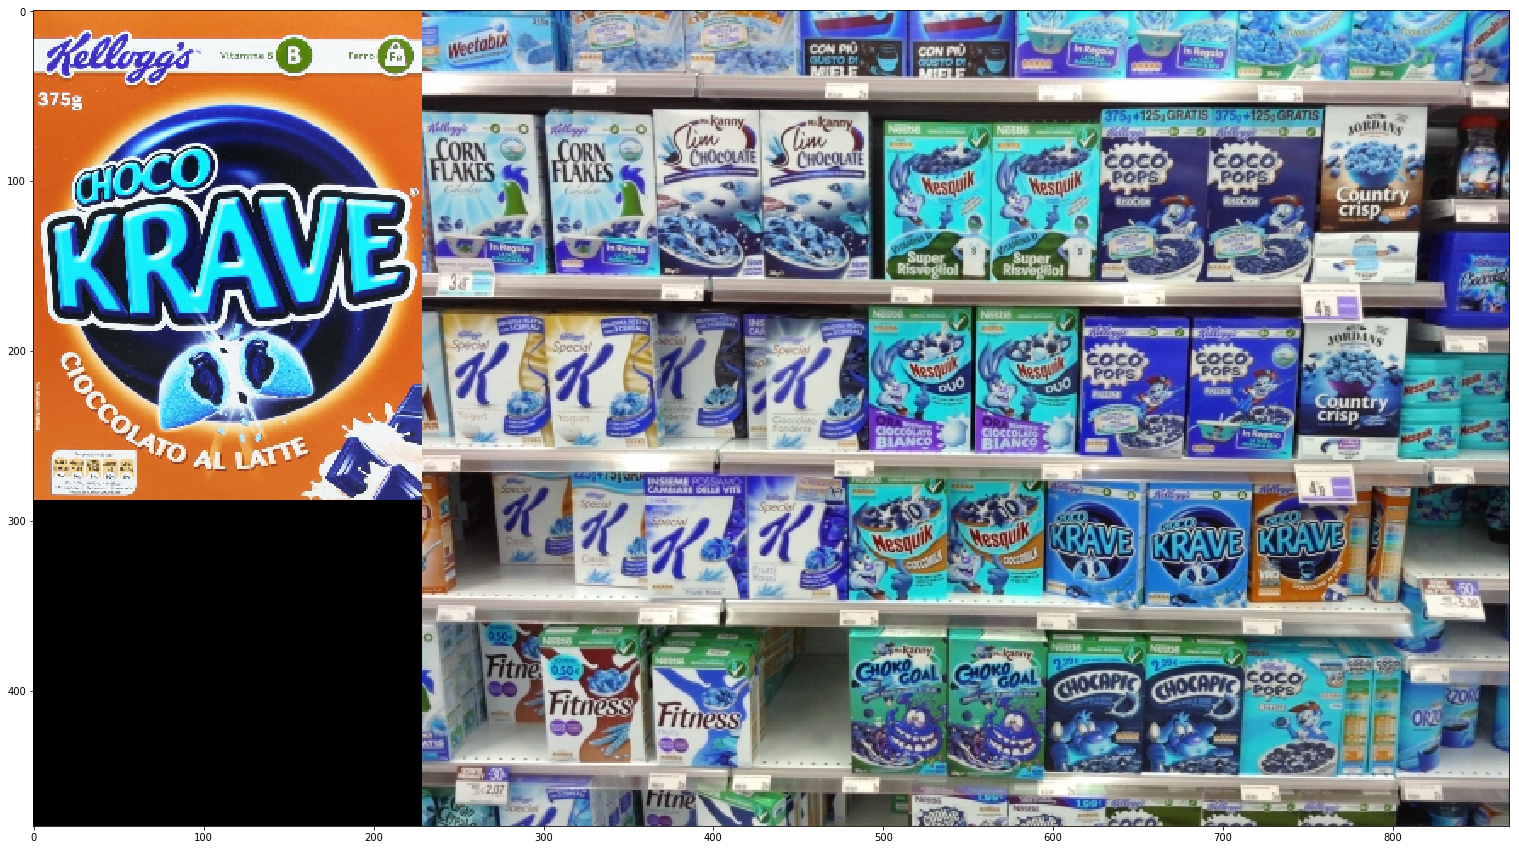

(<Figure size 2160x1080 with 1 Axes>,
 None)

In [7]:
import sys # For debugging only
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10


img1 = cv2.imread('object_detection_project\scenes\one.jpg',cv2.COLOR_BGR2RGB) # queryImage
img2 = cv2.imread('object_detection_project\scenes\h1.jpg',cv2.COLOR_BGR2RGB) # trainImage

#percent by which the image is resized
scale_percent = 20
#calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] *3*scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
img1 = cv2.resize(img1, dsize)



# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance <= MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure(figsize=(30, 15)),plt.imshow(img3, 'gray'),plt.show()